In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from stationarity import (
    plot_rolling_statistics,
    plot_date_based,
    check_stationarity,
    plot_acf_pacf,
    stl_decomposition,
    fourier_decomposition,
    plot_lagged_correlation,
    check_multicollinearity
)

# Data

In [2]:
# Load data
df = pd.read_excel('tsdata1.xlsx')
# Covert to datatime format & set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.head()

,x1_spend,x2_spend,weekly_sales
Date,,,
2020-01-05,2498.160475,8677.831327,6903.818046
2020-01-12,4802.857226,11323.058306,7557.368032
2020-01-19,3927.975767,11335.297108,5635.157330
2020-01-26,3394.633937,10357.746841,7165.125548
2020-02-02,1624.074562,5902.897701,5610.827416


In [3]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 160 entries, 2020-01-05 to 2023-01-22
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   x1_spend      160 non-null    float64
 1   x2_spend      160 non-null    float64
 2   weekly_sales  160 non-null    float64
dtypes: float64(3)
memory usage: 5.0 KB
None
          x1_spend      x2_spend  weekly_sales
count   160.000000    160.000000    160.000000
mean   2908.564010  10100.840493   6026.844527
std    1187.372098   2918.138610   1777.405743
min    1022.088468   5050.615838   1556.199905
25%    1905.913298   7560.169453   4839.880326
50%    2856.569819  10416.398782   5983.359333
75%    4027.438464  12421.993146   7377.765044
max    4947.547746  14900.538501   9918.686131


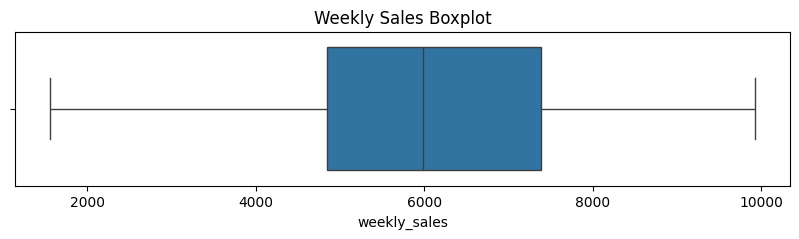

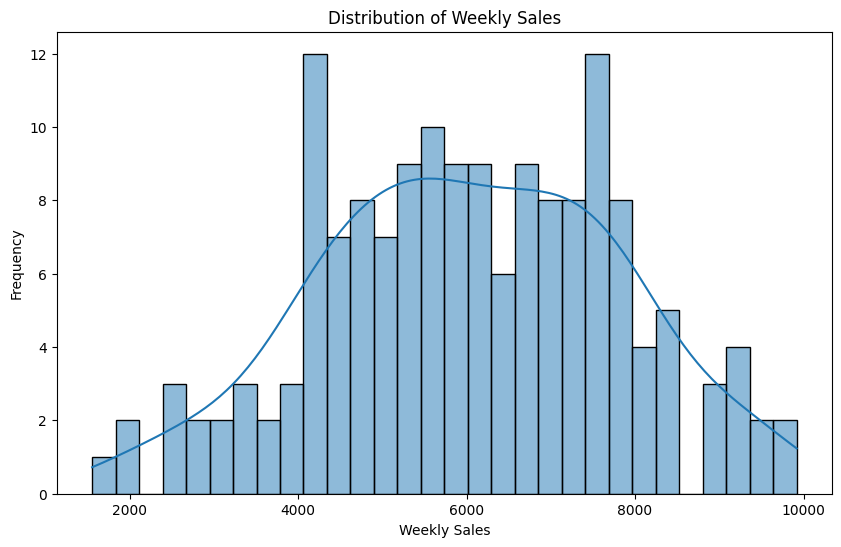

In [4]:
# Check outliers
plt.figure(figsize=(10, 2))
sns.boxplot(x=df['weekly_sales'])
plt.title('Weekly Sales Boxplot')
plt.show()

# Check distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['weekly_sales'], kde=True, bins=30)
plt.title('Distribution of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.show()

# Seasonality

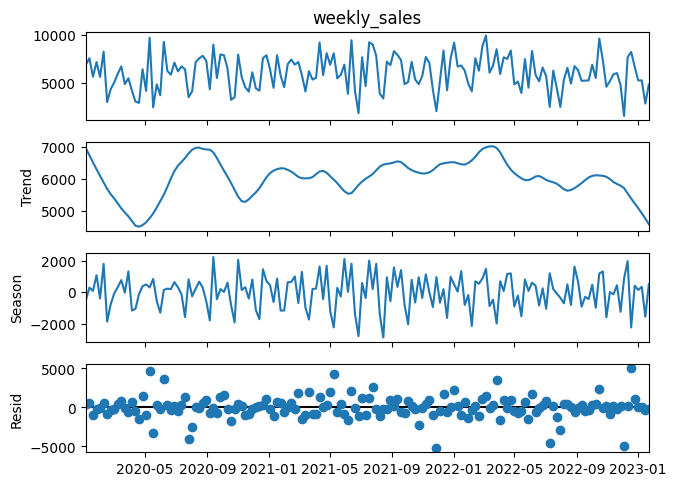

In [7]:
# Check seasonality by stl decomposition
s = 7          # 13 - seasonal, 26 - semi-annual, 52 - annual
y = df['weekly_sales']
stl_decomposition(y, period=s)

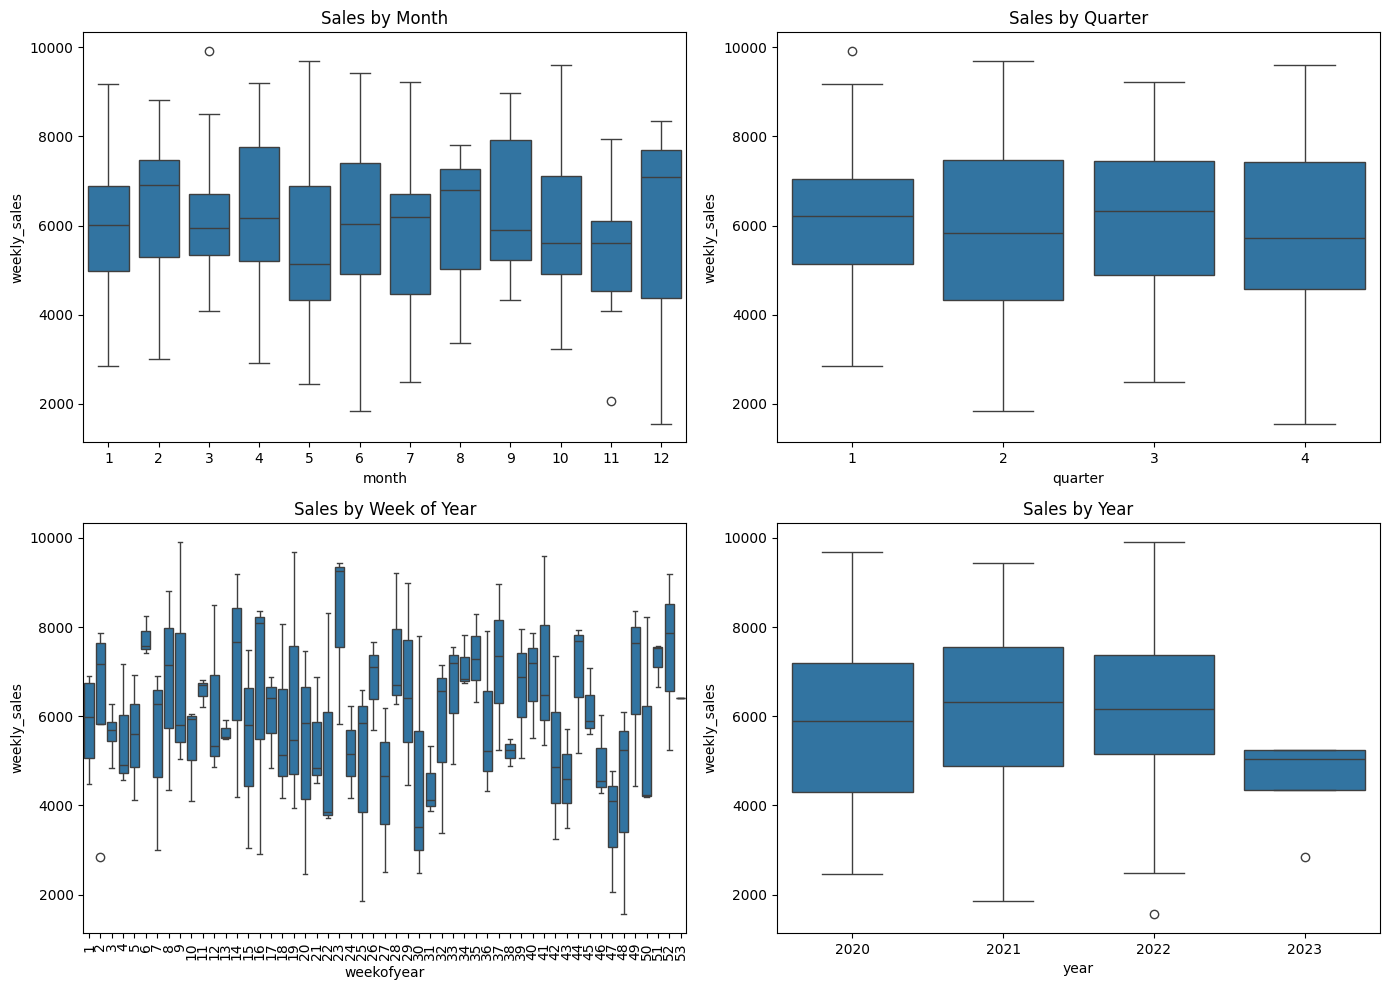

In [8]:
# Data-based seasonality
plot_date_based(df)

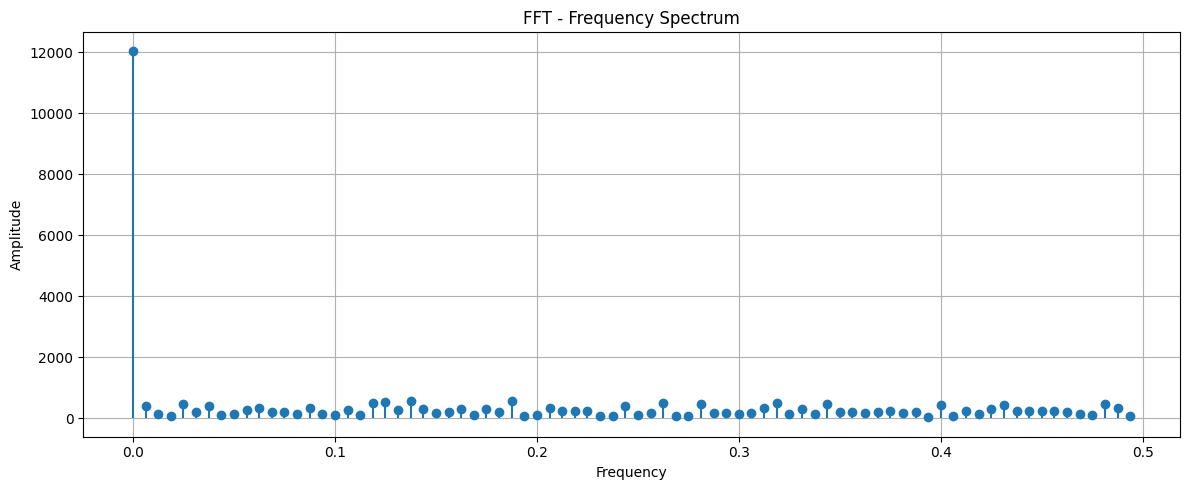

In [9]:
# Fouerier decomposition
fourier_decomposition(y)

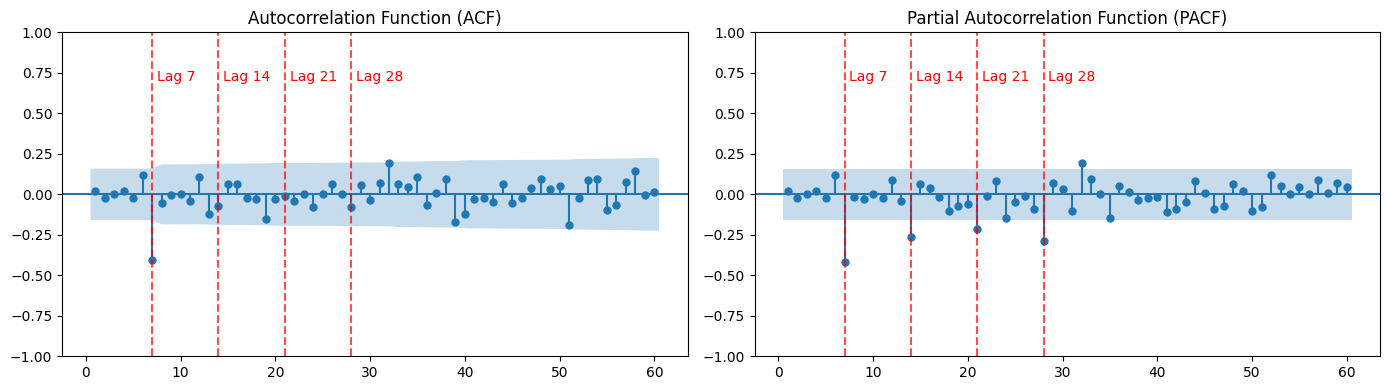

ADF Statistic: -4.8205
p-value: 0.0000
Critical Values:
   1%: -3.4783
   5%: -2.8826
   10%: -2.5780
Conclusion: The series is stationary.
KPSS Statistic: 0.0284
p-value: 0.1000
Critical Values:
   10%: 0.3470
   5%: 0.4630
   2.5%: 0.5740
   1%: 0.7390
Conclusion: The series is stationary.


/Users/zty/Desktop/penske/stationarity.py:74: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(series_clean, regression='c', nlags='auto')


In [10]:
# Difference the data by seasonal period
s = 7
y_seasonal_diff = y.diff(s).dropna()
plot_acf_pacf(y_seasonal_diff, lags=60, seasonal_lags=list(range(s, s * 5, s)))
check_stationarity(y_seasonal_diff)

# Stationarity

In [11]:
# Check stationarity statistically
check_stationarity(y)

ADF Statistic: -11.6156
p-value: 0.0000
Critical Values:
   1%: -3.4722
   5%: -2.8799
   10%: -2.5766
Conclusion: The series is stationary.
KPSS Statistic: 0.1211
p-value: 0.1000
Critical Values:
   10%: 0.3470
   5%: 0.4630
   2.5%: 0.5740
   1%: 0.7390
Conclusion: The series is stationary.


/Users/zty/Desktop/penske/stationarity.py:74: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(series_clean, regression='c', nlags='auto')


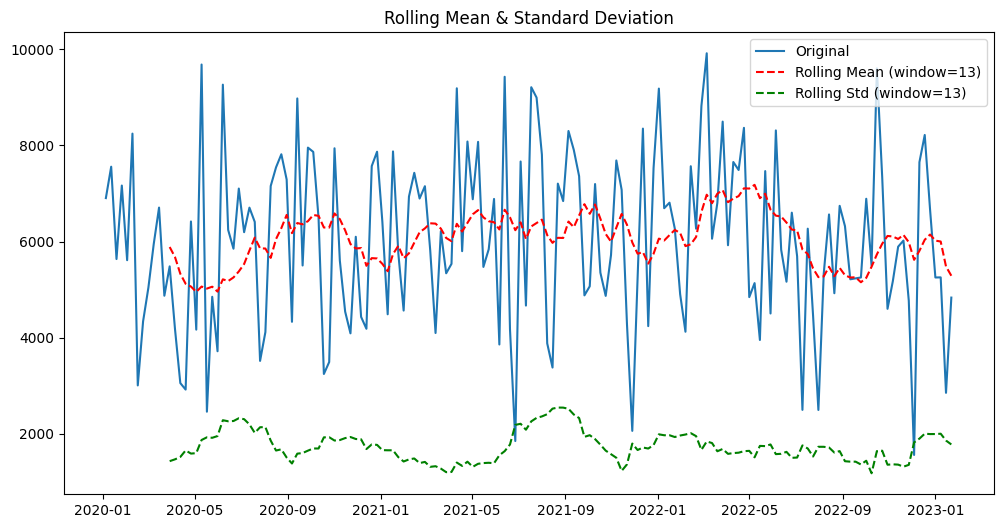

In [12]:
# Plot rolling statistics
plot_rolling_statistics(y, window=13)

Visual inspection shows some short-term variance shifts, they are not strong enough to invalidate stationarity.


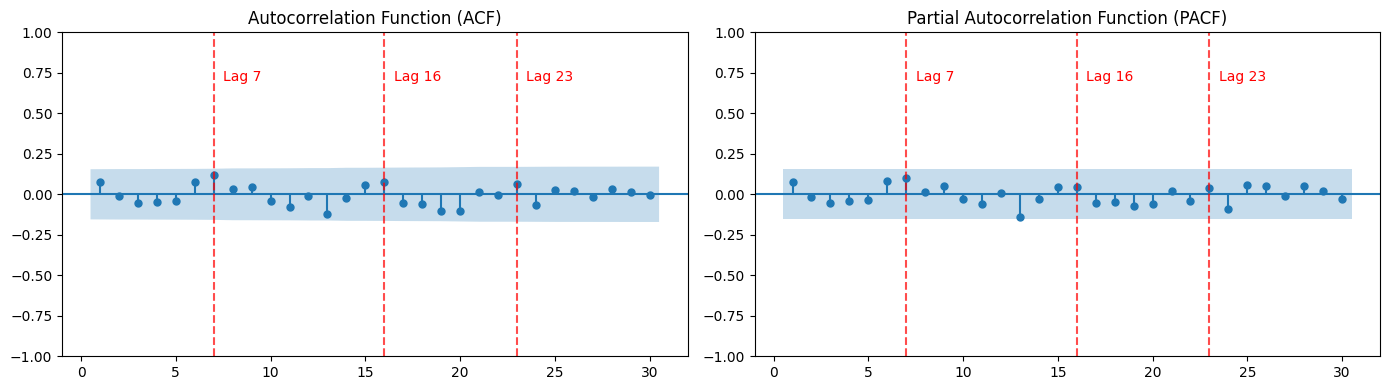

In [11]:
# Plot ACF and PACF
plot_acf_pacf(y, lags=30, seasonal_lags=[7, 16, 23])

### Exogenous Features

ADF Statistic: -11.9591
p-value: 0.0000
Critical Values:
   1%: -3.4722
   5%: -2.8799
   10%: -2.5766
Conclusion: The series is stationary.
KPSS Statistic: 0.0391
p-value: 0.1000
Critical Values:
   10%: 0.3470
   5%: 0.4630
   2.5%: 0.5740
   1%: 0.7390
Conclusion: The series is stationary.


/Users/zty/Desktop/penske/stationarity.py:92: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(series_clean, regression='c', nlags='auto')


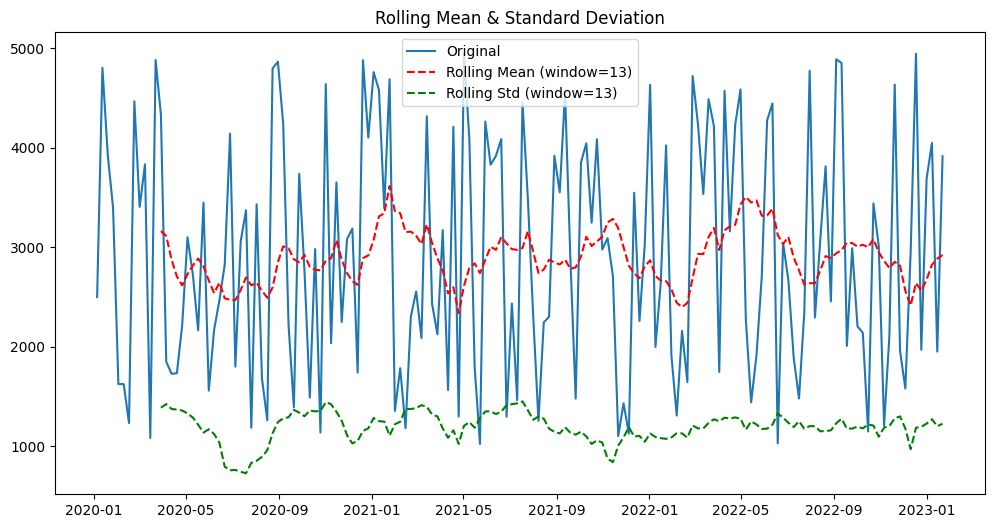

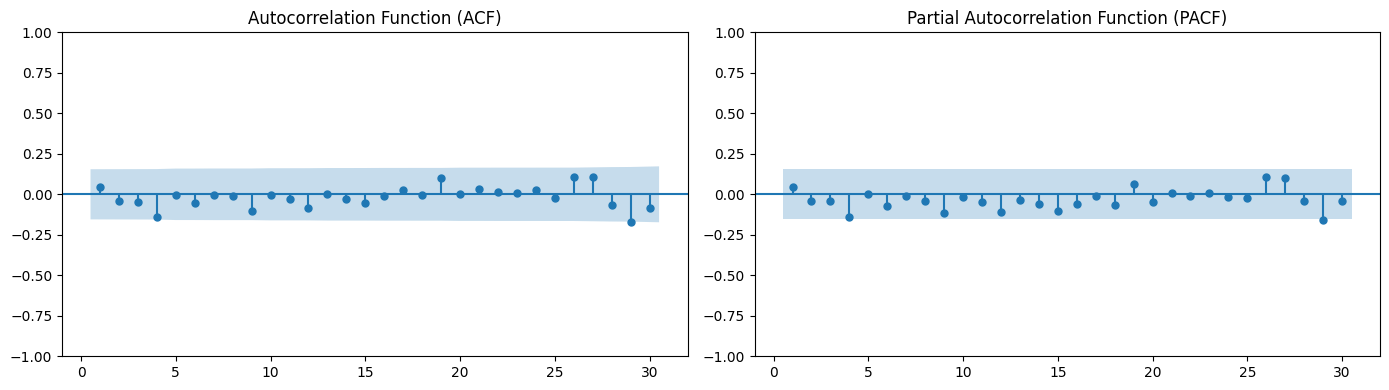

/Users/zty/Desktop/penske/stationarity.py:92: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(series_clean, regression='c', nlags='auto')


ADF Statistic: -11.2333
p-value: 0.0000
Critical Values:
   1%: -3.4722
   5%: -2.8799
   10%: -2.5766
Conclusion: The series is stationary.
KPSS Statistic: 0.1329
p-value: 0.1000
Critical Values:
   10%: 0.3470
   5%: 0.4630
   2.5%: 0.5740
   1%: 0.7390
Conclusion: The series is stationary.


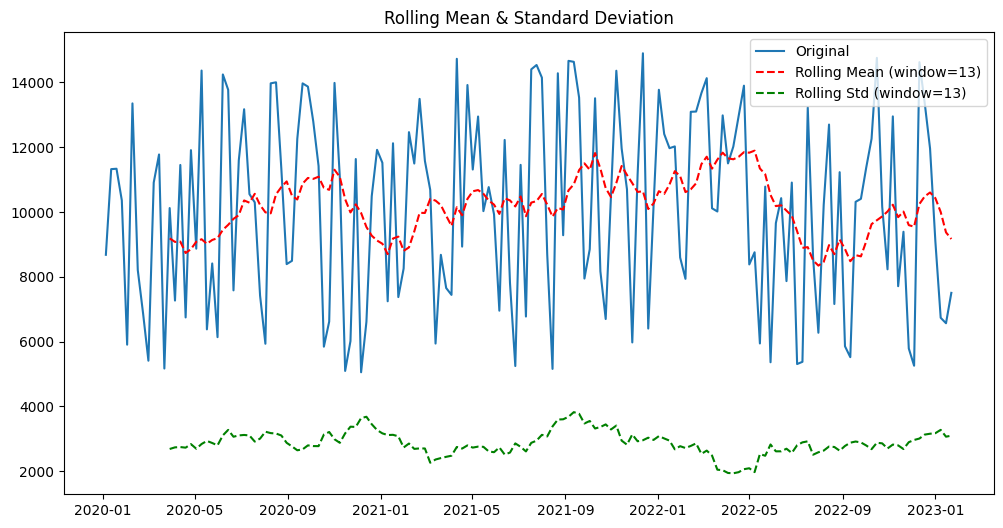

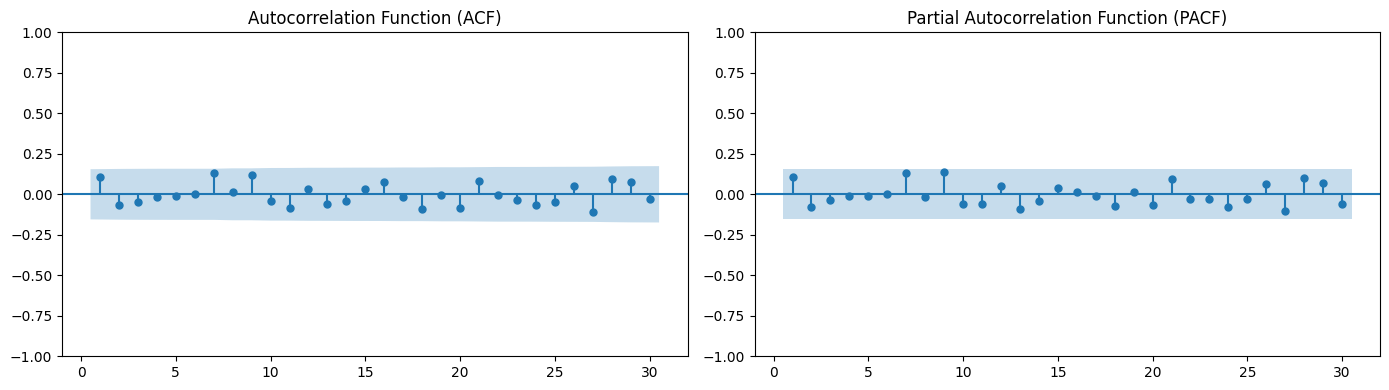

In [7]:
# Check features stationarity
check_stationarity(df['x1_spend'])
plot_rolling_statistics(df['x1_spend'], window=13)
plot_acf_pacf(df['x1_spend'], lags=30)

check_stationarity(df['x2_spend'])
plot_rolling_statistics(df['x2_spend'], window=13)
plot_acf_pacf(df['x2_spend'], lags=30)

/Users/zty/Desktop/penske/stationarity.py:242: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


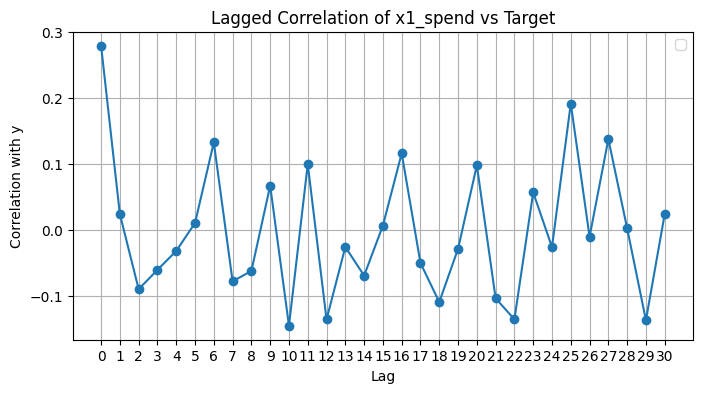

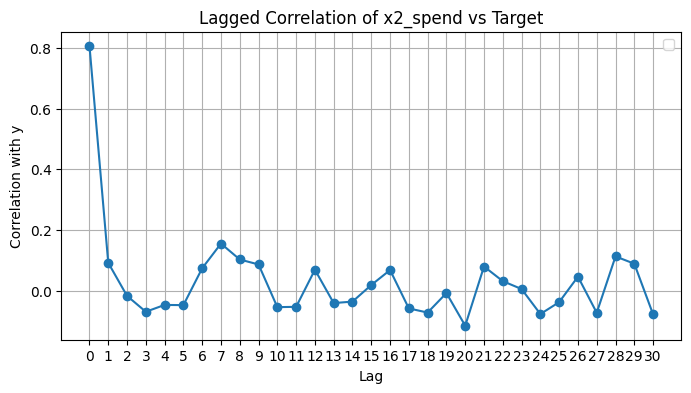

               VIF
feature           
x1_spend  4.916681
x2_spend  4.916681


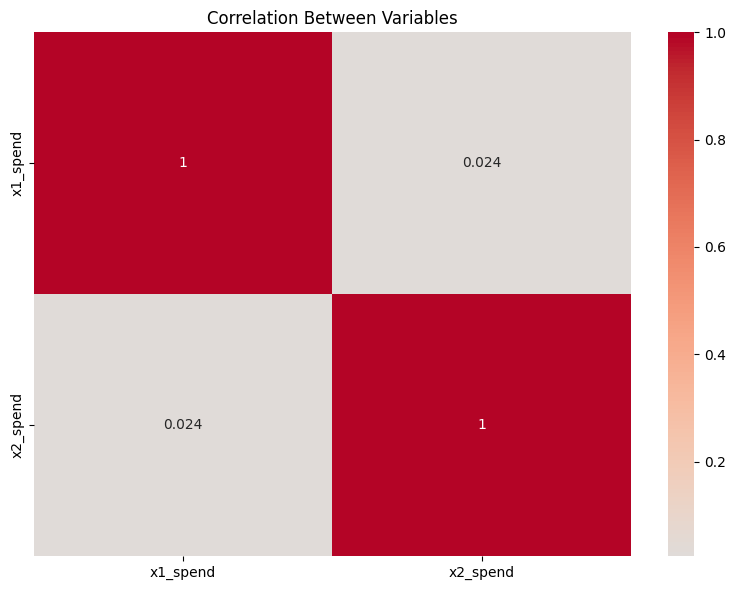

In [12]:
# Check correlation and multicollinearity
plot_lagged_correlation(df['x1_spend'], df['weekly_sales'], max_lag=30, exog_name='x1_spend')
plot_lagged_correlation(df['x2_spend'], df['weekly_sales'], max_lag=30, exog_name='x2_spend')
vif_table = check_multicollinearity(df=df, exog_cols=['x1_spend', 'x2_spend'])